# Prediction using Supervised ML

## Predict the percentage of marks of an student based on the number of study hours

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.shape

(25, 2)

# Missing Value Check 

In [6]:
round(100 * (data.isnull().sum()/len(data)),2)

Hours     0.0
Scores    0.0
dtype: float64

In [7]:
round(100 * (data.isnull().sum(axis=1)/len(data)),2).sort_values(ascending=False)[:10]

24    0.0
11    0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
dtype: float64

No missing values in row & columns

# Duplicate Check

In [8]:
data_d=data.copy()
data_d.drop_duplicates(subset=None, inplace=True)

In [9]:
data_d.shape

(25, 2)

In [10]:
del data_d
data.shape

(25, 2)

# EXPLORATORY DATA ANALYSIS

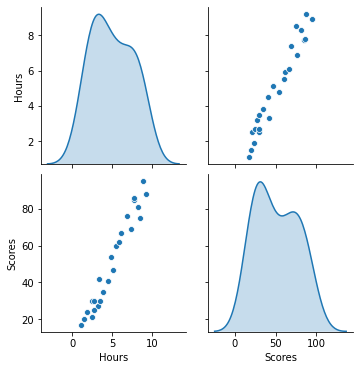

In [11]:
sns.pairplot(data, diag_kind='kde')
plt.show()

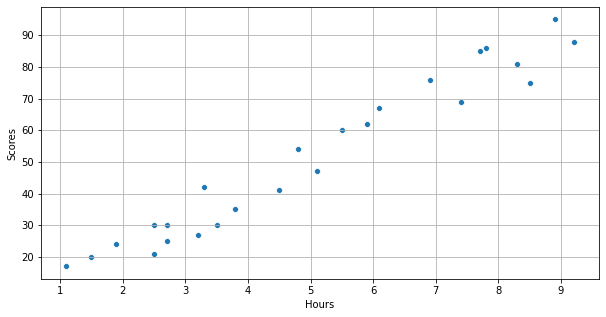

In [12]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.grid()
plt.show()

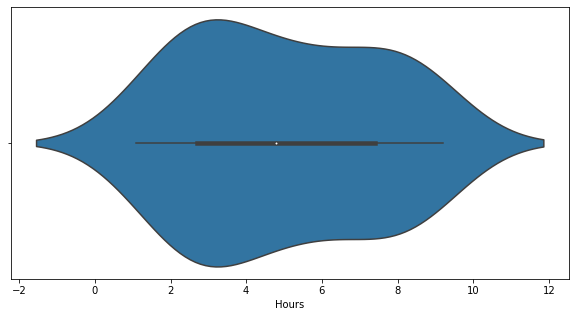

In [13]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Hours',data=data)
plt.show()

No Outliers found

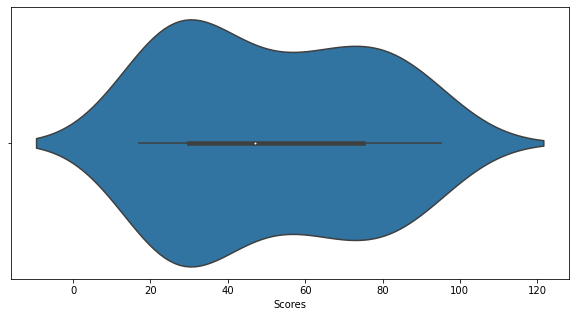

In [14]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Scores',data=data)
plt.show()

No Outliers found

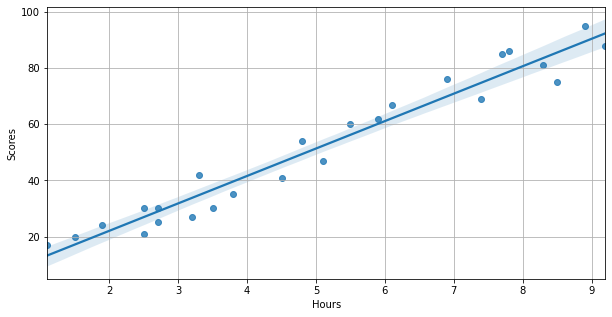

In [15]:
plt.figure(figsize=(10,5))
sns.regplot(x='Hours',y='Scores',data=data)
plt.grid()
plt.show()

Hours are directly proportional to Scores 

In [16]:
data.Hours.skew()

0.1903382010052985

Data is not skewed. 

# Test Train Split

In [17]:
# Creating X and Y sets 
X = data['Hours']
y = data['Scores']

In [18]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, random_state = 5)


In [19]:
# Checking the shapes for all the sets
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (17,)
X_test:  (8,)
y_train:  (17,)
y_test:  (8,)


# Training the model

In [20]:
# Reshaping X train set
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [21]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
# Displaying model parameters
print('Intercept of line: ',round(lr.intercept_,2))
print('Coefficent of Hours: ',lr.coef_)

Intercept of line:  3.52
Coefficent of Hours:  [9.45348802]


In [23]:
from sklearn.metrics import r2_score
y_train_pred = lr.predict(X_train)
r2score_train = r2_score(y_train,y_train_pred)*100
print('Train R2_score: ', round(r2score_train,2))

Train R2_score:  96.0


In [24]:
y_test_pred = lr.predict(X_test)
r2score_test = r2_score(y_test,y_test_pred)*100
print('Train R2_score: ', round(r2score_test,2))

Train R2_score:  92.49


# Validating Linear Regression assumptions

Error terms should be normally distributed with mean 0

In [25]:
#Error terms are normally distributed
res = y_train - y_train_pred

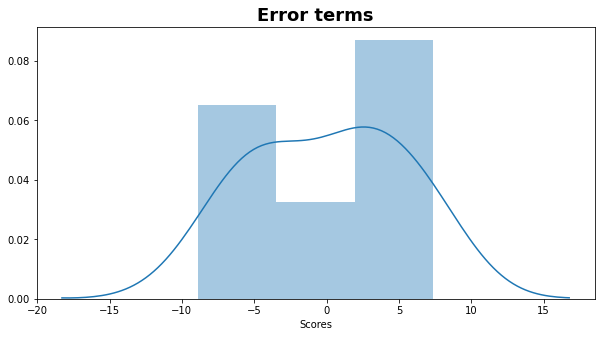

In [26]:
plt.figure(figsize=(10,5))
sns.distplot(res)
plt.title('Error terms',fontweight = 'bold', fontsize = 18)
plt.show()

 It can be seen that the error terms are normally distributed with mean 0. Hence validated one of the assumptions of Linear Regression

## Error terms should be randomly distributed

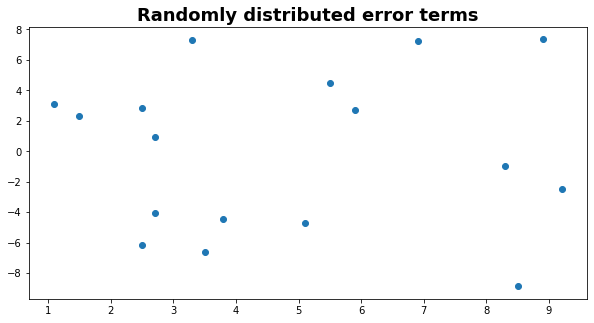

In [27]:
# Error terms should be randomly distributed
plt.figure(figsize=(10,5))
plt.scatter(X_train, res)
plt.title('Randomly distributed error terms',fontweight = 'bold', fontsize = 18)
plt.show()

Error terms/ residuals dont tend to follow any particular pattern as such. They seem to be distributed randomly. With this, validated another assumption for Linear Regression

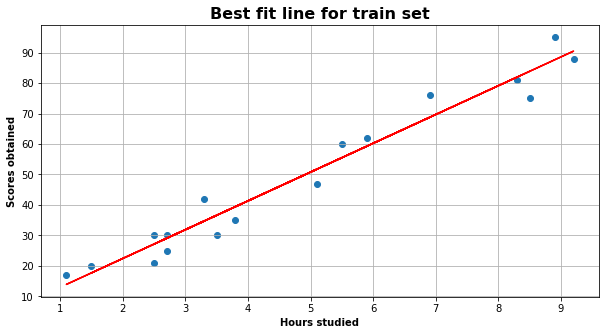

In [28]:
#Visualizing the fit on the train set
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.grid()
plt.xlabel('Hours studied', fontweight = 'bold')
plt.ylabel('Scores obtained', fontweight = 'bold')
plt.title('Best fit line for train set', fontweight = 'bold', fontsize = 16)
plt.show()

In [29]:
predicted_df = pd.DataFrame({'Actual': y_test, 'Predicted' : y_test_pred})
predicted_df.head()

,Actual,Predicted
19,69,73.471066
18,67,61.181532
2,27,33.766416
10,85,76.307113
21,54,48.891997


# Evaluation 

In [30]:
import sklearn.metrics
score_lr=lr.score(X_test,y_test)
evs_lr=sklearn.metrics.explained_variance_score(y_test,lr.predict(X_test))
me_lr=sklearn.metrics.max_error(y_test,lr.predict(X_test))
mae_lr=sklearn.metrics.mean_absolute_error(y_test,lr.predict(X_test))
mse_lr=sklearn.metrics.mean_squared_error(y_test,lr.predict(X_test))
msle_lr=sklearn.metrics.mean_squared_log_error(y_test,lr.predict(X_test))
Mae_lr=sklearn.metrics.median_absolute_error(y_test,lr.predict(X_test))
r2_lr=sklearn.metrics.r2_score(y_test,lr.predict(X_test))
mpd_lr=sklearn.metrics.mean_poisson_deviance(y_test,lr.predict(X_test))
mgd_lr=sklearn.metrics.mean_gamma_deviance(y_test,lr.predict(X_test))
mtd_lr=sklearn.metrics.mean_tweedie_deviance(y_test,lr.predict(X_test))
print('Score for Linear Regression                   :',score_lr)
print('Explained Variance Score for Linear Regression:',evs_lr)
print('Max Error for Ridge Rigression                :',me_lr)
print('Mean Absolute Error for Linear Regression     :',mae_lr)
print('Mean Square Error for Linear Regression       :',mse_lr)
print('Mean Squared Log Error for Linear Regression  :',msle_lr)
print('Median Absolute Error for Linear Regression   :',Mae_lr)
print('R2 Score for Linear Regression                :',r2_lr)
print('Mean Poisson Deviance for Linear Regression   :',mpd_lr)
print('Mean Gamma Deviance for Linear Regression     :',mgd_lr)
print('Mean Tweedie Deviance for Linear Regression   :',mtd_lr)

Score for Linear Regression                   : 0.9248556597026296
Explained Variance Score for Linear Regression: 0.9313169242410377
Max Error for Ridge Rigression                : 8.747538663803056
Mean Absolute Error for Linear Regression     : 5.897931072550458
Mean Square Error for Linear Regression       : 38.71694720790297
Mean Squared Log Error for Linear Regression  : 0.014376061666189982
Median Absolute Error for Linear Regression   : 5.46323551550066
R2 Score for Linear Regression                : 0.9248556597026296
Mean Poisson Deviance for Linear Regression   : 0.694871288031722
Mean Gamma Deviance for Linear Regression     : 0.014860078104863617
Mean Tweedie Deviance for Linear Regression   : 38.71694720790297


In [31]:
#Objective is to find out scores for studied hour 9.25

hours = 9.25
new_pred = lr.predict([[hours]])
print("           Number of hours = {}".format(hours))
print("Predicted percentage score = {}".format(round(new_pred[0],2)))

           Number of hours = 9.25
Predicted percentage score = 90.96
